# Comparison of Classifiers for Student Performance Prediction

## The dataset


### What is the purpose of the dataset?
This dataset is for creating classification models that will predict the students dropout and their academic success.

### What are the features


Each instance in the dataset represents a student.

### What is the target?

The target is


## Analyzing the dataset

In [16]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [17]:
dataset = pd.read_csv('dataset_student_performance.csv',sep=";")
dataset.info()
#dataframe = pd.DataFrame(dataset)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
#dataset.head()

## "Data washing"

By looking at the contents of the dataset. We observe that the features are already encoded into integers.
So what we will need to do is 
- Split the features into categorical and numerical features.

After that is done, we will need to 
- Encode the categorical ones differently so they are not integers, we can achieve this by using one hot encoding.

### Splitting the features into categorical and numerical features

By using the dataset.info(), we can see what features are numerical and integer(categorical).
We need to be cautious to not assume all the integers are categorical. For instance, age, is not a catagorical feature even though it's an integer.

The numerical:

- 6,   Previous qualification (grade)                  , float64
- 12,  Admission grade                                 , float64
- 25,  Curricular units 1st sem (grade)                , float64
- 31,  Curricular units 2nd sem (grade)                , float64
- 33,  Unemployment rate                               , float64
- 34,  Inflation rate                                  , float64
- 35,  GDP                                             , float64

The target: 
- 36  Target,  object, which is three categories, encoded as ints. (dropout, enrolled, and graduate)

By inspecting the documentation further, we can now make an overview over what integers are categorical, and which are not.

The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The non categorical: 

- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32  Curricular units 2nd sem (without evaluations), int64  


So, now we can combine them and perphaps group them into the following:


The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The numerical:

- 6,  Previous qualification (grade), float64
- 12, Admission grade, float64
- 25, Curricular units 1st sem (grade), float64
- 31, Curricular units 2nd sem (grade), float64
- 33, Unemployment rate, float64
- 34, Inflation rate, float64
- 35, GDP, float64
- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32, Curricular units 2nd sem (without evaluations), int64  

The target(categorical): 
- 36  Target,  object

In [7]:
#print(dataset.columns.tolist())
#Here we can double check that the syntax of the lists are correct according to the index.
#'Daytime/evening attendance\t' will give an index error if the \t is not included.

In [18]:
categorical_features = [
    "Marital status", "Application mode", "Application order", "Course", 
    "Daytime/evening attendance\t", "Previous qualification", "Nacionality", 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

numerical_features = [
    "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", 
    "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", 
    "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", 
    "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
    "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)"
]

target = "Target"
dataset_categorical = dataset[categorical_features]
dataset_numerical = dataset[numerical_features]
dataset_target = dataset[target]

<Axes: >

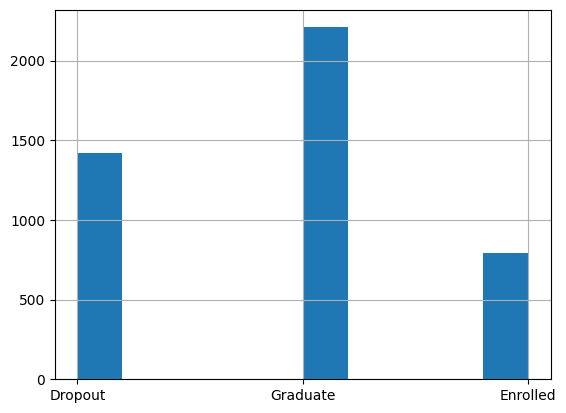

In [19]:
dataset_target.hist()

We need to balance the classes, because we can see that the model will train on more graduate since there is more data in that output?

In [10]:
#dataset_oversampled,_ = SMOTENC('auto').fit_resample(categorical_features, dataset['Target'])
#dataset_oversampled_dataframe = pd.concat


## Making Onehot encoding of the categorical features


In [20]:
dataset_categorical_onehot = pd.get_dummies(dataset_categorical)
#dataset_categorical_onehot.info()

In [21]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
combined_dataset.head()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74,20,0,0,...,12,5,9,1,0,0,1,1,0,0
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79,19,0,6,...,3,3,3,1,0,0,0,1,0,0
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74,19,0,6,...,37,9,9,1,0,0,0,1,0,0
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12,20,0,6,...,37,5,3,1,0,0,1,0,0,0
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79,45,0,6,...,38,9,9,0,0,0,1,0,0,0


## Now lets combine them together again


In [22]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
#combined_dataset.info()

## Creating our split

In [23]:
train_val = combined_dataset.groupby('Target', group_keys=False)[combined_dataset.columns].apply(lambda x: x.sample(frac=0.8))
test_set = combined_dataset.drop(train_val.index)

In [24]:
features = combined_dataset.drop('Target', axis=1)
targets = combined_dataset['Target']

train_val_features = train_val.drop('Target', axis=1)
train_val_targets = train_val['Target']

test_features = test_set.drop('Target', axis=1)
test_targets = test_set['Target']

## Pre-proccessing 

Lets proceed with the dataset now, and see what kind of results it produces. After that we can take pre processing steps to see how it changes the result.
But here we can expand by trying out normalization, PCA, etc.

## Splitting

### Why this split percentage
### Why this sampling technique

## Creating the models


### Evaluation function


In [16]:
'''
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="macro", multi_class="ovr")}')
    print()
'''
#

'\ndef evaluate(model):\n    train_probabilities = model.predict_proba(train_val_features)\n    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)\n\n    print(f\'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}\')\n    print(f\'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}\')\n\n    test_probabilities = model.predict_proba(test_features)\n    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)\n\n    print(f\'Test Accuracy: {accuracy_score(test_targets, test_predictions)}\')\n    print(f\'Test Precision: {precision

In [17]:
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="micro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="micro")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="micro")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="micro")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="micro", multi_class="ovr")}')
    print()


## Tuning the hyperparameters

### Grid search

In [18]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']


## Creating a function for GridSearch

### and creating param grid dictionaries

In [19]:
param_grid_RF = {
        'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        'max_features': np.arange(0.1, 1.0, 0.05),
        }


param_grid_GB = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }


param_grid_ADA = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 1.1, 0.3),
    'estimator__max_depth': np.arange(1, 6, 2)
    }


param_grid_NB = {
    'var_smoothing': np.logspace(-9, -6, 4)  # 1e-9, 1e-8, 1e-7, 1e-6 ?
    }


In [20]:
def train_grid_search(classifier, parameter_grid, scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit=refit,
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [21]:
train_grid_search(RandomForestClassifier(),param_grid_RF,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
best parameters: {'max_depth': np.int64(11), 'max_features': np.float64(0.20000000000000004), 'n_estimators': np.int64(95)}
best score: 0.7717


(RandomForestClassifier(max_depth=np.int64(11),
                        max_features=np.float64(0.20000000000000004),
                        n_estimators=np.int64(95)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.016087      0.001464         0.026471        0.004379   
 1         0.033801      0.004678         0.025720        0.001765   
 2         0.049734      0.004676         0.026588        0.004585   
 3         0.063843      0.003235         0.029323        0.001254   
 4         0.081603      0.012454         0.032374        0.005106   
 ..             ...           ...              ...             ...   
 535       0.960893      0.010545         0.031900        0.001538   
 536       1.122455      0.015767         0.033180        0.000242   
 537       1.264331      0.026117         0.031021        0.002627   
 538       1.359641      0.018693         0.026801        0.000471   
 539       1.454247      0.030247         0.028434        0.

In [22]:
train_grid_search(GradientBoostingClassifier(),param_grid_GB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best parameters: {'learning_rate': np.float64(0.16000000000000003), 'max_depth': np.int64(3), 'n_estimators': np.int64(100)}
best score: 0.7821


(GradientBoostingClassifier(learning_rate=np.float64(0.16000000000000003),
                            max_depth=np.int64(3), n_estimators=np.int64(100)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        1.106808      0.036031         0.025320        0.000962   
 1        2.186869      0.034006         0.028622        0.000720   
 2        3.368741      0.082752         0.032200        0.001713   
 3        4.625556      0.195820         0.035328        0.001738   
 4        2.036896      0.073184         0.028414        0.001598   
 ..            ...           ...              ...             ...   
 75      12.873870      0.125423         0.052808        0.002083   
 76       5.535430      0.138634         0.035763        0.000783   
 77      10.556969      0.158625         0.041941        0.003053   
 78      14.138261      0.262508         0.049503        0.001418   
 79      15.214510      0.493796         0.053347        0.000910   
 
     param_lear

In [23]:
train_grid_search(AdaBoostClassifier(estimator=DecisionTreeClassifier()),param_grid_ADA,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


best parameters: {'estimator__max_depth': np.int64(1), 'learning_rate': np.float64(0.31), 'n_estimators': np.int64(150)}
best score: 0.7626


(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=np.int64(1)),
                    learning_rate=np.float64(0.31), n_estimators=np.int64(150)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.349706      0.007947         0.041700        0.000985   
 1        0.709811      0.038715         0.063109        0.003226   
 2        1.021741      0.041146         0.085171        0.002478   
 3        1.333354      0.018632         0.100387        0.002031   
 4        0.347604      0.013551         0.042442        0.001616   
 5        0.701469      0.036247         0.064744        0.004089   
 6        0.995613      0.016627         0.083270        0.004067   
 7        1.412163      0.070473         0.111093        0.007189   
 8        0.341561      0.009822         0.043453        0.001077   
 9        0.723837      0.022836         0.065766        0.003836   
 10       1.017845      0.027695         0.086568        0.003658   
 11       1.37

In [24]:
train_grid_search(GaussianNB(),param_grid_NB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best parameters: {'var_smoothing': np.float64(1e-08)}
best score: 0.6923


(GaussianNB(var_smoothing=np.float64(1e-08)),
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       0.005435      0.000484         0.018210        0.000981   
 1       0.007094      0.000904         0.017591        0.001204   
 2       0.007665      0.001190         0.015965        0.001874   
 3       0.005990      0.000907         0.013354        0.000771   
 
    param_var_smoothing                    params  split0_test_accuracy  \
 0         1.000000e-09  {'var_smoothing': 1e-09}              0.662429   
 1         1.000000e-08  {'var_smoothing': 1e-08}              0.683616   
 2         1.000000e-07  {'var_smoothing': 1e-07}              0.676554   
 3         1.000000e-06  {'var_smoothing': 1e-06}              0.649718   
 
    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  ...  \
 0              0.699153              0.717514              0.679379  ...   
 1              0.706215              0.720339              0.682203  ...   
 2  

## Creating the classifiers


In [25]:
random_forest_model = RandomForestClassifier(max_depth=11,max_features=0.25,n_estimators=75)
random_forest_model.fit(train_val_features,train_val_targets)

RandomForestClassifier(max_depth=11, max_features=0.25, n_estimators=75)

In [26]:
evaluate(random_forest_model)

Training Accuracy: 0.9375529810680984
Training Precision: 0.9375529810680984
Training Recall: 0.9375529810680984
Training F1: 0.9375529810680984
Training ROC AUC: 0.9872352004519774
Test Accuracy: 0.7943502824858757
Test Precision: 0.7943502824858757
Test Recall: 0.7943502824858757
Test F1: 0.7943502824858757
Test ROC AUC: 0.9155593858725142



In [ ]:
gradient_booster_model = GradientBoostingClassifier(learning_rate=0.21,max_depth=3,n_estimators=150)
gradient_booster_model.fit(train_val_features,train_val_targets)

GradientBoostingClassifier(learning_rate=0.21, n_estimators=150)

In [28]:
evaluate(gradient_booster_model)

Training Accuracy: 0.9228595648488274
Training Precision: 0.9228595648488274
Training Recall: 0.9228595648488274
Training F1: 0.9228595648488274
Training ROC AUC: 0.9863750877179255
Test Accuracy: 0.7740112994350282
Test Precision: 0.7740112994350282
Test Recall: 0.7740112994350282
Test F1: 0.7740112994350282
Test ROC AUC: 0.9158868779724855



In [ ]:
ada_booster_model = AdaBoostClassifier(learning_rate=0.61,n_estimators=200) # adding estimator__depth=1 makes things too difficult

ada_booster_model.fit(train_val_features,train_val_targets)

c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.61, n_estimators=200)

In [30]:
evaluate(ada_booster_model)

Training Accuracy: 0.7866628991240463
Training Precision: 0.7866628991240463
Training Recall: 0.7866628991240463
Training F1: 0.7866628991240463
Training ROC AUC: 0.8949891975908699
Test Accuracy: 0.7672316384180791
Test Precision: 0.7672316384180791
Test Recall: 0.7672316384180791
Test F1: 0.7672316384180791
Test ROC AUC: 0.8710357815442562



In [31]:
naive_bayes_model = GaussianNB(var_smoothing=1e-08)
naive_bayes_model.fit(train_val_features,train_val_targets)

GaussianNB(var_smoothing=1e-08)

In [52]:
evaluate(naive_bayes_model)


Training Accuracy: 0.6959593105397005
Training Precision: 0.6959593105397005
Training Recall: 0.6959593105397005
Training F1: 0.6959593105397005
Training ROC AUC: 0.8290311661420027
Test Accuracy: 0.6847457627118644
Test Precision: 0.6847457627118644
Test Recall: 0.6847457627118644
Test F1: 0.6847457627118644
Test ROC AUC: 0.8207216955536404



## The results

Random forest:

- Training Accuracy: 0.9355750211924272
- Training Precision: 0.9355750211924272
- Training Recall: 0.9355750211924272
- Training F1: 0.9355750211924272
- Training ROC AUC: 0.986769673666562
- Test Accuracy: 0.7796610169491526
- Test Precision: 0.7796610169491526
- Test Recall: 0.7796610169491526
- Test F1: 0.7796610169491526
- Test ROC AUC: 0.9200555395959016


Gradient booster:

- Training Accuracy: 0.919468776490534
- Training Precision: 0.919468776490534
- Training Recall: 0.919468776490534
- Training F1: 0.919468776490534
- Training ROC AUC: 0.9849100815911443
- Test Accuracy: 0.7706214689265537
- Test Precision: 0.7706214689265537
- Test Recall: 0.7706214689265537
- Test F1: 0.7706214689265537
- Test ROC AUC: 0.9246704331450094

Ada booster:

- Training Accuracy: 0.7855326363379486
- Training Precision: 0.7855326363379486
- Training Recall: 0.7855326363379486
- Training F1: 0.7855326363379486
- Training ROC AUC: 0.8923516516120655
- Test Accuracy: 0.7728813559322034
- Test Precision: 0.7728813559322034
- Test Recall: 0.7728813559322034
- Test F1: 0.7728813559322034
- Test ROC AUC: 0.8779495036547609

GaussianDB:

- Training Accuracy: 0.6908731280022605
- Training Precision: 0.6908731280022605
- Training Recall: 0.6908731280022605
- Training F1: 0.6908731280022605
- Training ROC AUC: 0.8247690270949284
- Test Accuracy: 0.6903954802259887
- Test Precision: 0.6903954802259887
- Test Recall: 0.6903954802259887
- Test F1: 0.6903954802259887
- Test ROC AUC: 0.8304315490440166





In [42]:

'''
RF_result = pd.Series(Training Accuracy: 0.9355750211924272
Training Precision: 0.9355750211924272
Training Recall: 0.9355750211924272
Training F1: 0.9355750211924272
Training ROC AUC: 0
Test Accuracy: 0.7796610169491526
Test Precision: 0.7796610169491526
Test Recall: 0.7796610169491526
Test F1: 0.7796610169491526
Test ROC AUC: 0) '''

'\nRF_result = pd.Series(Training Accuracy: 0.9355750211924272\nTraining Precision: 0.9355750211924272\nTraining Recall: 0.9355750211924272\nTraining F1: 0.9355750211924272\nTraining ROC AUC: 0\nTest Accuracy: 0.7796610169491526\nTest Precision: 0.7796610169491526\nTest Recall: 0.7796610169491526\nTest F1: 0.7796610169491526\nTest ROC AUC: 0) '

## Comparison of the classifiers

based on the results

In [ ]:
def create_pipeline(classifier):
    return Pipeline([
        ('scaler', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('pca', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('classifier', classifier)])

dt_pipeline = create_pipeline(DecisionTreeClassifier())

dt_params = {
    'scaler__transformers': [[('no_scaling', 'passthrough', dataset_numerical)], [('standard', StandardScaler(), dataset_numerical)]]
}


#GridSeachCV(dt_pipeline, dt_params) Fill out here

## Conclusion

## Possible improvements

- Using pipeline in the "data washing"
- Adding results to a dataframe for clearer comparison
- Adding confussion matrix

In [12]:
import tensorflow as tf

from keras.src.layers import Input, Dense, Dropout, Flatten, Softmax, BatchNormalization
from keras.src.models import Sequential
from keras.src.callbacks import Callback

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Neural Networks

In [26]:
#How to make a Neuralnetwork Model
neural_network_seq = Sequential([ #Make a sequential model
  #All the Layers u want in our model
    #First ur input model
    Input(shape=(10,)), #the shape has to match ur features, 10 features in this case

    #Then all the Dense and fancy Layers
    Dense(8,activation='sigmoid'), # Dense layer with 8 neurons
    Dropout(0.1),    #Drop out layer with 10% drop out rate -> this prevents overfitting
    Dense(4, activation='sigmoid'),
    Dropout(0.05),

    #And a output Layer
    #Dense(1,activation='linear'), #Output layers are normal denselayer, but the number of neurons has to fit the amount of targets (1 in this case)
                                 #this output is for a REGRESSION problem so the activation function is linear (all numbers are possible)
])
#note that the amount of neurons decreases from layer to layer (input=10 neurons, 1. dense: 8 neurons , 2. dense: 4, output: 1)

#compile ur model with a optimizer, loss function and all the metrics u want
neural_network_seq.compile(optimizer='adam',
                 loss='mean_squared_error',
                 metrics = ['mean_squared_error','r2_score','mean_absolute_error'])
#lets check the structure of ur neural network
neural_network_seq.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124 (496.00 B)

 Trainable params: 124 (496.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
#train ur model with the features, targets for a number of epochs and with a batch_size
neural_network_seq.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 36)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 36), dtype=float32)
  • training=True
  • mask=None

In [11]:
# Our first network.
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(train_val_features.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 neurons for 3 classes
])

NameError: name 'train_val_features' is not defined

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model1.fit(train_val_features,train_val_targets, epochs=50, batch_size=32, validation_split=0.2)